In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# https://www.kaggle.com/tunguz/drug-use-by-age

In [2]:
os.chdir(r"D:\\")

In [3]:
# Đọc file
df = pd.read_csv("drug-use-by-age.csv")
df["oxycontin-frequency"] = df["oxycontin-frequency"].astype("float")
df["alcohol-frequency"] = df["alcohol-frequency"].astype("float")


In [4]:
df

,age,count,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5,0.1,19.0
2,14,2792,18.1,5.0,8.7,24,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24,0.2,16.5
3,15,2956,29.2,6.0,14.5,25,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36,0.2,3.0
5,17,3038,49.3,13.0,28.0,36,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48,0.5,6.5
6,18,2469,58.7,24.0,33.7,52,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12,0.4,10.0
7,19,2223,64.6,36.0,33.4,60,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105,0.3,6.0
8,20,2271,69.7,48.0,34.0,60,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12,0.5,4.0
9,21,2354,83.2,52.0,33.0,52,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2,0.3,9.0


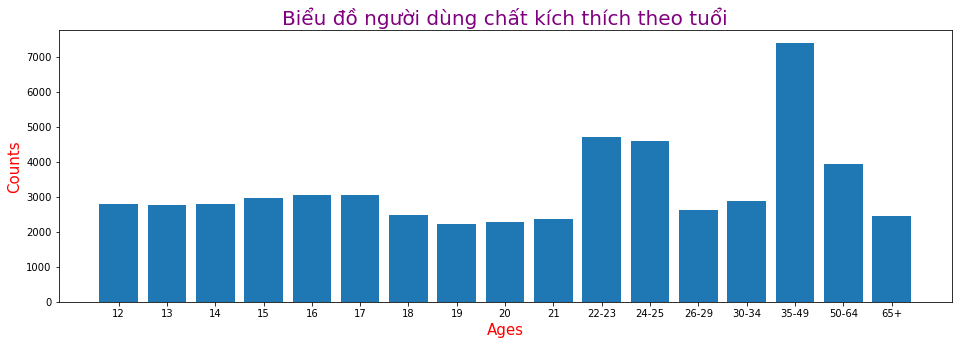

In [5]:
# Biểu đồ số lượng người dùng chất kích thích theo tuổi
f, ax = plt.subplots(figsize=(16,5))
labels = [age for age, df in df.groupby("age")] 
plt.bar(labels, df["count"])
plt.xlabel("Ages", color = "r", fontsize = 15)
plt.ylabel("Counts", color = "r", fontsize = 15)
plt.title("Biểu đồ người dùng chất kích thích theo tuổi", fontsize =20, color ="purple")
plt.show()

<Figure size 432x288 with 0 Axes>

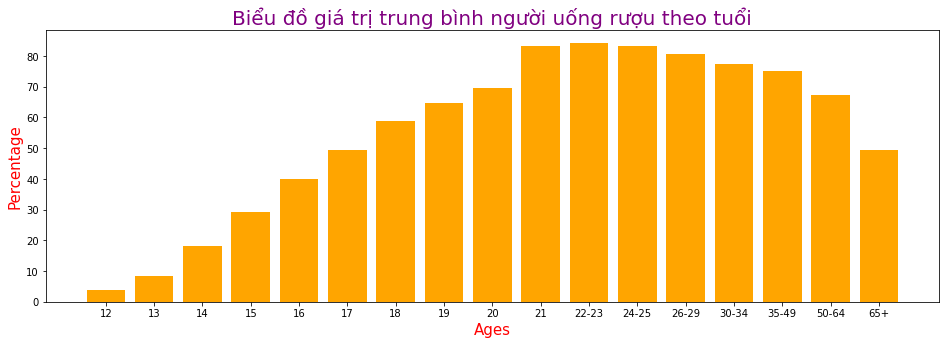

In [6]:
# Biểu đồ giá trị trung bình uống rượu theo tuổi
plt.clf()
f, ax = plt.subplots(figsize=(16,5))
plt.bar(df["age"], df["alcohol-use"], color = "orange")
plt.xlabel("Ages", color = "r", fontsize = 15)
plt.ylabel("Percentage", color = "r", fontsize = 15)
plt.title("Biểu đồ giá trị trung bình người uống rượu theo tuổi", fontsize =20, color="purple")
plt.show()

In [7]:
# Thống kê người dùng từ 12 đến 21 tuổi
Total_12_to_21 = df["count"][0:10]
# Thống kê người dùng từ 22 đến hơn 65 tuổi
Total_22_to_65 = df["count"][10:]

# H0: Không có sự khác biết giữa hai khoảng tuổi này 
# H1 : Có sự khác biệt giữa hai khoảng tuổi này

In [8]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(Total_12_to_21, Total_22_to_65)
pval
"""Vì pval < 0.05 nên suy ra là có sự khác biệt về người số lượng người dùng chất kích thích giữa hai khoảng tuổi."""

'Vì pval < 0.05 nên suy ra là có sự khác biệt về người số lượng người dùng chất kích thích giữa hai khoảng tuổi.'

# Có sự liên quan nào giữa tần suất uống rượu và tần suất dùng oxycontin hay không?

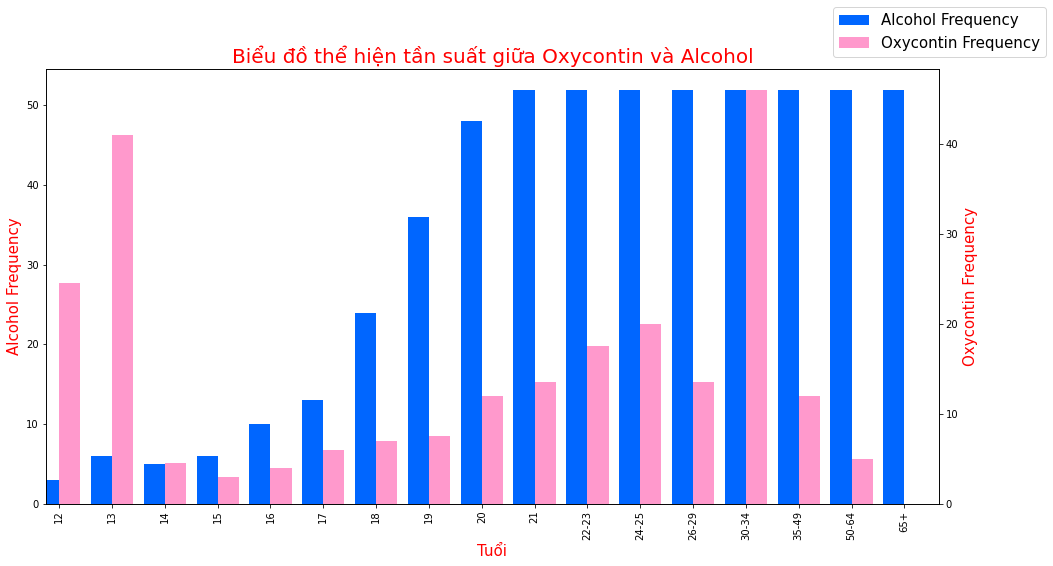

In [9]:
from scipy.stats import pearsonr
# Tính Covariance
covariance_acohol_oxycotin = np.cov(df["oxycontin-frequency"], df["alcohol-frequency"])
# Tính Correlation
correlation, p = pearsonr(df["oxycontin-frequency"], df["alcohol-frequency"])
#Biểu đồ side by side
fig = plt.figure(figsize=(16,8)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
df["alcohol-frequency"].plot(kind='bar', ax=ax, color = "#0066FF", width=width, position=1,label = "Alcohol Frequency")
df["oxycontin-frequency"].plot(kind='bar',color = "#FF99CC", ax=ax2, width=width, position=0, label = "Oxycontin Frequency")
ax.set_xlabel("Tuổi", fontsize =15, color = "r")
ax.set_ylabel("Alcohol Frequency", color = "r", fontsize =15)
ax2.set_ylabel("Oxycontin Frequency", color ="r", fontsize =15)
ax.set_xticks(range(len(df["age"])))
ax.set_xticklabels(df["age"])
plt.title("Biểu đồ thể hiện tần suất giữa Oxycontin và Alcohol", fontsize =20, color = "r")
fig.legend(prop = {"size": 15})
plt.show()

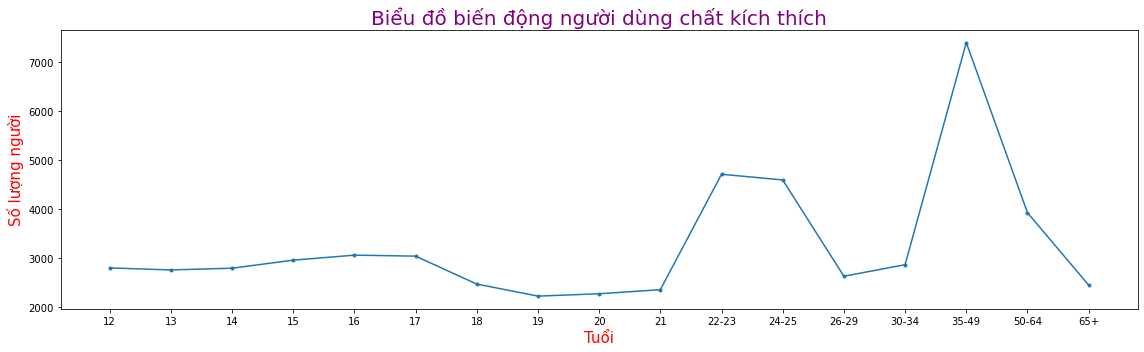

'Từ biểu đồ ta có thể thấy sự tương phản rằng là từ tuổi 12 -> 17 có số lượng người dùng khá cao, vì tuổi này đang trong giai đoạn\ntìm tòi tò mò, từ 18 tuổi -> 21 tuổi thì có lẽ là trong thời gian học tập nên không có thời gian dùng chất kích thích\n. Số lượng người dùng chất kích thích giảm ở giai đoạn 24-25 với 26-29 nhưng đến 30-34 thì tăng nhẹ. Suy ra không có sự liên kết nào\nchặt chẽ có thể cho răng tuổi càng cao thì càng giảm người dùng, hay là tuổi càng thấp thì nhiều người dùng.'

In [10]:
from scipy.stats import pearsonr
covariance_age_count = np.cov([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 50, 65], df["count"])
correlation_age_count , p = pearsonr([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 50, 65], df["count"])
# Biểu đồ
f, ax = plt.subplots(figsize=(16,5))
plt.plot(df["age"], df["count"], marker=".")
plt.title("Biểu đồ biến động người dùng chất kích thích", fontsize =20, color ="purple")
plt.xlabel("Tuổi",fontsize=15,color="red")
plt.ylabel("Số lượng người", fontsize=15,color="red")
plt.tight_layout()
plt.show()
"""Từ biểu đồ ta có thể thấy sự tương phản rằng là từ tuổi 12 -> 17 có số lượng người dùng khá cao, vì tuổi này đang trong giai đoạn
tìm tòi tò mò, từ 18 tuổi -> 21 tuổi thì có lẽ là trong thời gian học tập nên không có thời gian dùng chất kích thích
. Số lượng người dùng chất kích thích giảm ở giai đoạn 24-25 với 26-29 nhưng đến 30-34 thì tăng nhẹ. Suy ra không có sự liên kết nào
chặt chẽ có thể cho răng tuổi càng cao thì càng giảm người dùng, hay là tuổi càng thấp thì nhiều người dùng."""

# Tuổi càng cao thì tỉ lệ dùng rượu có càng tăng hay không?

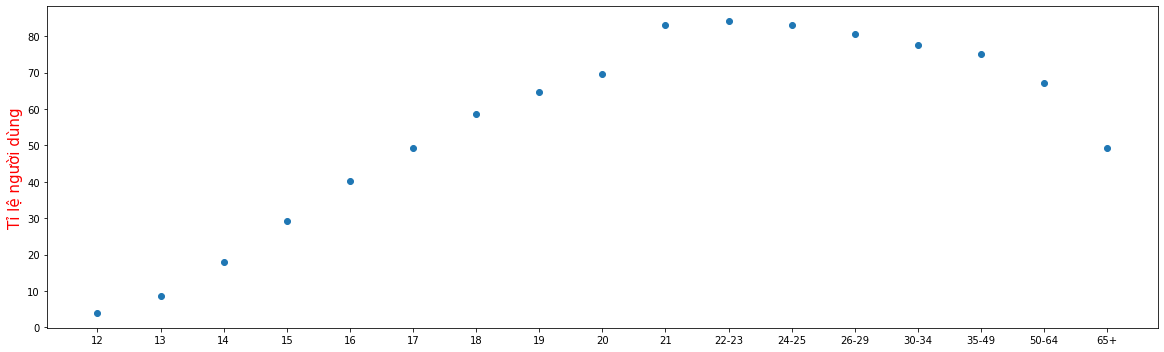

'Từ biểu đồ ta thấy tuổi càng cao thì tỉ lệ dùng rượu càng nhiều và chỉ có giảm đi một ít từ giai đoạn 26 tuổi trở đi.'

In [11]:
from scipy.stats import pearsonr
covariance_age_alcohol = np.cov([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 50, 65], df["alcohol-use"])
correlation_age_alcohol, p = pearsonr([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 50, 65], df["alcohol-use"])
# Biểu đồ
f, ax = plt.subplots(figsize=(16,5))
plt.scatter(data = df, x = "age", y = "alcohol-use")
plt.tight_layout()
plt.ylabel("Tỉ lệ người dùng", fontsize =15, color = "r")
plt.show()
"""Từ biểu đồ ta thấy tuổi càng cao thì tỉ lệ dùng rượu càng nhiều và chỉ có giảm đi một ít từ giai đoạn 26 tuổi trở đi."""

## Số lần uống rượu trong 12 tháng gần đây có ảnh hưởng gì đến số lần sử dụng cocain hay không?

<Figure size 432x288 with 0 Axes>

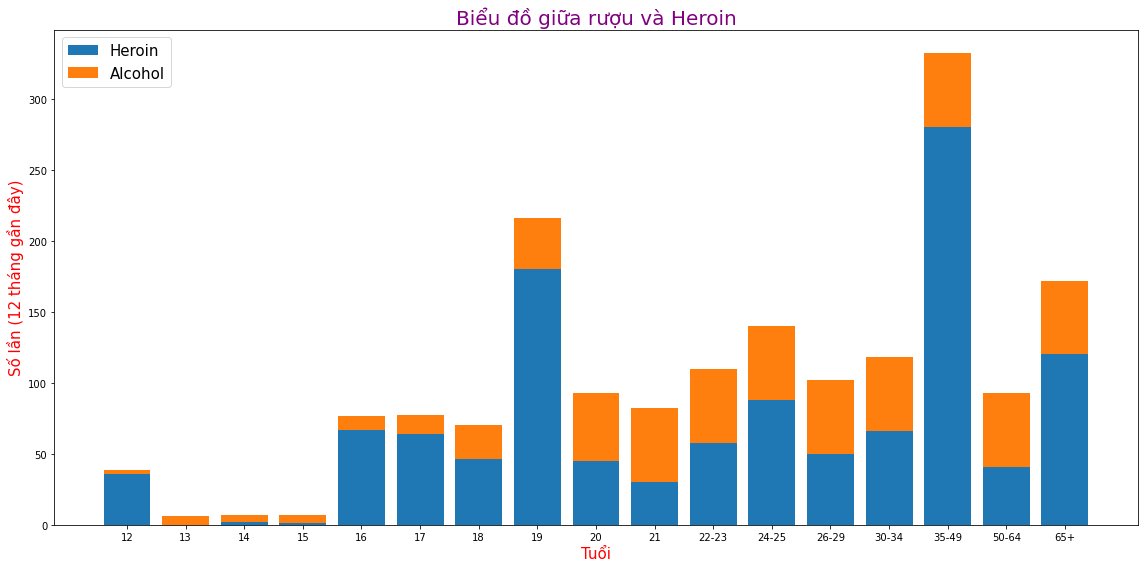

In [14]:
plt.clf()
plt.figure(figsize=(16,8))
plt.bar(df["age"], df["heroin-frequency"])
plt.bar(df["age"], df["alcohol-frequency"],bottom = df["heroin-frequency"])
plt.title("Biểu đồ giữa rượu và Heroin", color = "purple", fontsize ="20")
plt.xlabel("Tuổi",color ="r", fontsize =15)
plt.ylabel("Số lần (12 tháng gần đây)", color="r",fontsize=15)
plt.legend(["Heroin","Alcohol"],loc =2, prop = {"size": 15})
plt.tight_layout()
plt.show()